In [1]:
%matplotlib inline
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns
import sklearn as sl
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Part1: data Exploration

In [2]:
my_data = pd.read_csv('TVdata.txt')

In [3]:
my_data.info

<bound method DataFrame.info of       video_id  cvt_per_day  weighted_categorical_position  \
0       385504   307127.606                              1   
1       300175   270338.426                              1   
2       361899   256165.867                              1   
3       308314   196622.721                              3   
4       307201   159841.652                              1   
5       389496   135076.610                              1   
6       385507   134155.740                              1   
7       380517   116906.008                              1   
8       369857   116871.122                              2   
9       393463   111565.597                              2   
10      307719   103283.899                              3   
11      302360    98665.990                              1   
12      300842    94997.158                              3   
13      326237    93536.514                              3   
14      300243    91924.547           

In [4]:
my_data.head(2)

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,import_id,release_year,genres,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,awards,mpaa,star_category
0,385504,307127.606,1,3,lionsgate,2013,"Action,Thriller,Drama",69614,15000000,42930462,6.500,112.301,51,other award,PG-13,1.710
1,300175,270338.426,1,3,lionsgate,2013,"Comedy,Crime,Thriller",46705,15000000,3301046,6.500,94.983,41,no award,R,3.250


In [10]:
my_data.describe()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
count,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000
mean,280371.163,4218.630,7.783,28.104,2001.057,6462.924,2150743.439,2536338.472,5.257,89.556,15.974,0.955
std,112640.128,13036.080,6.134,11.864,17.497,31596.007,7176604.483,8243516.266,2.123,21.086,26.205,0.955
min,7909.000,2.188,1.000,1.000,1916.000,0.000,0.000,0.000,0.000,4.037,0.000,0.000
25%,285104.250,351.169,4.000,20.000,1998.000,81.000,0.000,0.000,4.300,82.602,0.000,0.000
50%,313891.500,1193.500,6.000,28.000,2008.000,535.000,0.000,0.000,5.800,90.730,0.000,1.000
75%,349345.750,3356.789,9.000,36.000,2012.000,3053.000,1500000.000,0.000,6.800,99.500,41.000,1.667
max,394880.000,307127.606,41.000,70.000,2017.000,948630.000,107000000.000,184208848.000,10.000,246.017,100.000,4.000


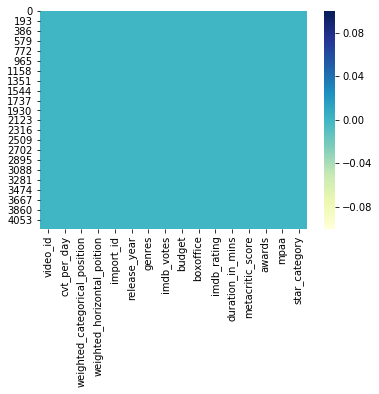

In [8]:
sns.heatmap(my_data.isnull(),cmap = 'YlGnBu')

In [5]:
tv_data_df = my_data
tv_data_df.shape

(4226, 16)

In [11]:
print ("Num of rows: " + str(tv_data_df.shape[0])) # row count
print ("Num of columns: " + str(tv_data_df.shape[1])) # col count

Num of rows: 4226
Num of columns: 16


In [6]:
print(len(tv_data_df.set_index('video_id').index.get_duplicates()))

0


In [7]:
# check duplicated entry
if len(tv_data_df.set_index('video_id').index.get_duplicates()) == 0:
    print('There is no duplicated entry (video_id based).')

There is no duplicated entry (video_id based).


In [ ]:
#Understand the numerical features

In [ ]:
# note : video_id, release_year  are not numerical features although they are represented by numbers

In [8]:
tv_data_df.drop(['video_id', 'release_year'],axis=1).describe(percentiles = [.1, .25, .5, .75, .95])

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
count,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000
mean,4218.630,7.783,28.104,6462.924,2150743.439,2536338.472,5.257,89.556,15.974,0.955
std,13036.080,6.134,11.864,31596.007,7176604.483,8243516.266,2.123,21.086,26.205,0.955
min,2.188,1.000,1.000,0.000,0.000,0.000,0.000,4.037,0.000,0.000
10%,141.985,3.000,13.000,8.000,0.000,0.000,2.300,62.391,0.000,0.000
25%,351.169,4.000,20.000,81.000,0.000,0.000,4.300,82.602,0.000,0.000
50%,1193.500,6.000,28.000,535.000,0.000,0.000,5.800,90.730,0.000,1.000
75%,3356.789,9.000,36.000,3053.000,1500000.000,0.000,6.800,99.500,41.000,1.667
95%,14692.834,22.000,48.000,26199.500,12000000.000,8551228.000,7.800,119.131,65.000,2.597
max,307127.606,41.000,70.000,948630.000,107000000.000,184208848.000,10.000,246.017,100.000,4.000


In [16]:
print((tv_data_df == 0).sum())

video_id                            0
cvt_per_day                         0
weighted_categorical_position       0
weighted_horizontal_poition         0
import_id                           0
release_year                        0
genres                              0
imdb_votes                        344
budget                           2454
boxoffice                        3194
imdb_rating                       344
duration_in_mins                    0
metacritic_score                 3012
awards                              0
mpaa                                0
star_category                    1846
dtype: int64


In [17]:
print(tv_data_df.dtypes)

video_id                           int64
cvt_per_day                      float64
weighted_categorical_position      int64
weighted_horizontal_poition        int64
import_id                         object
release_year                       int64
genres                            object
imdb_votes                         int64
budget                             int64
boxoffice                          int64
imdb_rating                      float64
duration_in_mins                 float64
metacritic_score                   int64
awards                            object
mpaa                              object
star_category                    float64
dtype: object


In [14]:
sns.set_style('darkgrid')

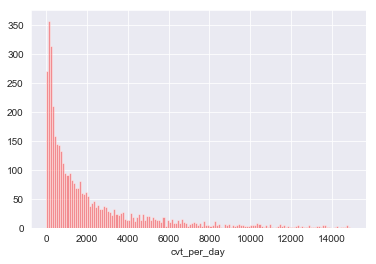

In [26]:
sns.distplot(tv_data_df['cvt_per_day'],bins = range(0,15000, 100), color = 'red',kde = False)

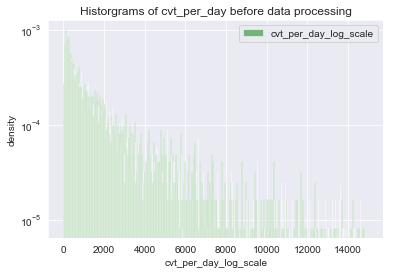

In [15]:
# log scale of y due to large variation
plt.hist(tv_data_df['cvt_per_day'].values, log = True, bins = range(0,15000, 30), alpha = 0.5, color='g', label = 'cvt_per_day_log_scale', normed = True)
plt.legend(loc ='upper right')
plt.title('Historgrams of cvt_per_day before data processing')
plt.xlabel('cvt_per_day_log_scale')
plt.ylabel('density')
plt.show()

In [ ]:
#1.2.2 cvt_per_day feature. cvt is continuouos view time

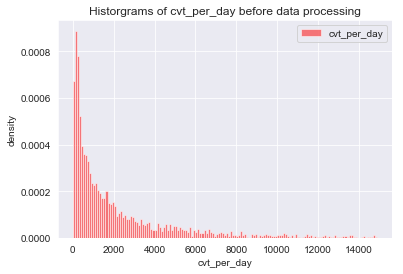

In [16]:
# cvt_per_day data explore
plt.hist(tv_data_df['cvt_per_day'].values, bins = range(0,15000, 100), alpha = 0.5, color='r', label = 'cvt_per_day', normed = True)
plt.legend(loc ='upper right')
plt.title('Historgrams of cvt_per_day before data processing')
plt.xlabel('cvt_per_day')
plt.ylabel('density')
plt.show()

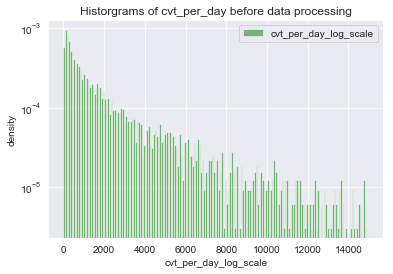

In [18]:
# log scale of y due to large variation
plt.hist(tv_data_df['cvt_per_day'].values, log = True, bins = range(0,15000, 80), alpha = 0.5, color='g', label = 'cvt_per_day_log_scale', normed = True)
plt.legend(loc ='upper right')
plt.title('Historgrams of cvt_per_day before data processing')
plt.xlabel('cvt_per_day_log_scale')
plt.ylabel('density')
plt.show()

In [ ]:
#Correlation among numerical features

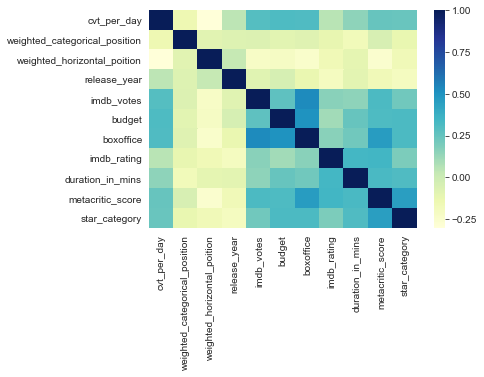

In [29]:
sns.heatmap(tv_data_df.drop(['video_id'],axis=1).corr(),cmap="YlGnBu")

In [30]:
tv_data_df.drop(['video_id'],axis=1).corr()

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
cvt_per_day,1.000,-0.148,-0.302,0.046,0.298,0.316,0.312,0.059,0.152,0.249,0.247
weighted_categorical_position,-0.148,1.000,-0.084,-0.069,-0.064,-0.090,-0.074,-0.116,-0.174,-0.044,-0.123
weighted_horizontal_poition,-0.302,-0.084,1.000,0.027,-0.221,-0.211,-0.245,-0.162,-0.102,-0.255,-0.168
release_year,0.046,-0.069,0.027,1.000,-0.083,-0.040,-0.128,-0.199,-0.097,-0.167,-0.198
imdb_votes,0.298,-0.064,-0.221,-0.083,1.000,0.273,0.531,0.163,0.156,0.322,0.225
budget,0.316,-0.090,-0.211,-0.040,0.273,1.000,0.505,0.106,0.251,0.315,0.322
boxoffice,0.312,-0.074,-0.245,-0.128,0.531,0.505,1.000,0.164,0.226,0.465,0.322
imdb_rating,0.059,-0.116,-0.162,-0.199,0.163,0.106,0.164,1.000,0.344,0.347,0.192
duration_in_mins,0.152,-0.174,-0.102,-0.097,0.156,0.251,0.226,0.344,1.000,0.327,0.309
metacritic_score,0.249,-0.044,-0.255,-0.167,0.322,0.315,0.465,0.347,0.327,1.000,0.452


In [ ]:
# 1.3.1 simple categorical features(import_id, awards)

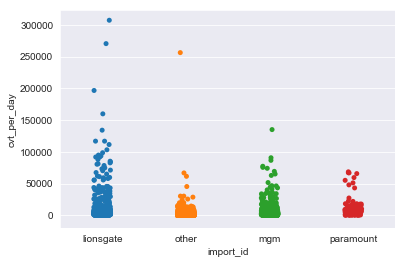

In [31]:
sns.stripplot(x='import_id', y='cvt_per_day', data=tv_data_df, jitter=True)

In [32]:
print(tv_data_df['import_id'].value_counts())

other        2963
lionsgate     677
mgm           445
paramount     141
Name: import_id, dtype: int64


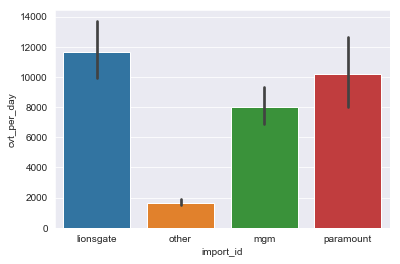

In [33]:
sns.barplot(x='import_id', y='cvt_per_day', data=tv_data_df)

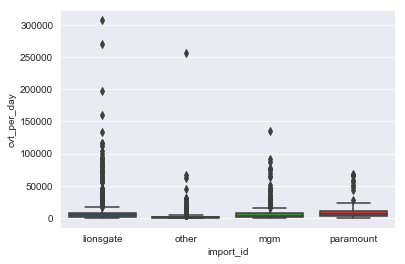

In [34]:
sns.boxplot(x='import_id', y='cvt_per_day', data=tv_data_df)

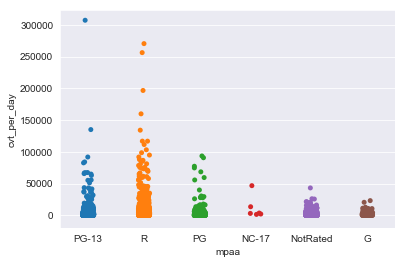

In [35]:
sns.stripplot(x='mpaa', y='cvt_per_day', data=tv_data_df, jitter=True)

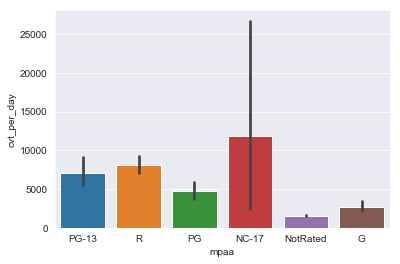

In [36]:
sns.barplot(x='mpaa', y='cvt_per_day', data=tv_data_df)

In [37]:
print(tv_data_df['mpaa'].value_counts())

NotRated    2158
R           1158
PG-13        426
PG           353
G            125
NC-17          6
Name: mpaa, dtype: int64


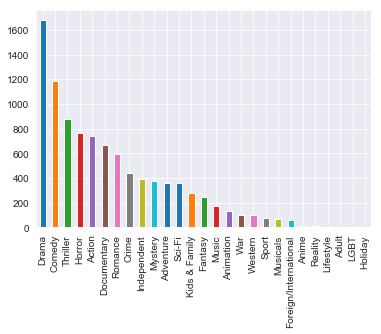

In [19]:
# generes explore, split the genre of each video
gen_split = tv_data_df['genres'].str.get_dummies(sep=',').mul(1, axis=0).sum()
gen_split.sort_values(ascending=False).plot.bar()

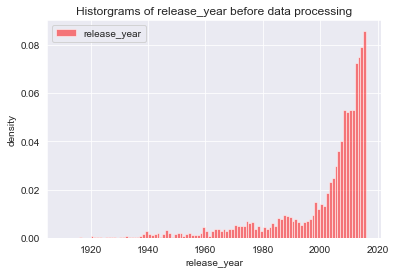

count   4226.000
mean    2001.057
std       17.497
min     1916.000
10%     1974.000
20%     1991.000
30%     2001.000
40%     2006.000
50%     2008.000
60%     2010.000
70%     2012.000
80%     2013.000
90%     2014.000
max     2017.000
Name: release_year, dtype: float64


In [20]:
plt.figure(1)
plt.hist(tv_data_df['release_year'].values, bins = range(1910, 2017, 1), alpha = 0.5, color='r', label = 'release_year', normed = True)
plt.legend(loc ='upper left')
plt.title('Historgrams of release_year before data processing')
plt.xlabel('release_year')
plt.ylabel('density')
plt.show()

print(tv_data_df['release_year'].describe(percentiles = [.1, .2, .3, .4,.5, .6, .7, .8, .9]))

# Part2: Feature Prepprocessing

In [21]:
# Convert 3 Categorical variables into dummy variables
d_import_id = pd.get_dummies(tv_data_df['import_id']).astype(np.int64)
d_mpaa = pd.get_dummies(tv_data_df['mpaa']).astype(np.int64)
d_awards = pd.get_dummies(tv_data_df['awards']).astype(np.int64)

In [22]:
# Convert 'genres' into dummy variables
d_genres = pd.DataFrame() 
for genre in ['Action', 'Adult', 'Adventure', 'Animation', 'Anime', 'Comedy', 'Crime', 'Documentary', 'Drama'
          , 'Fantasy', 'Foreign/International', 'Holiday', 'Horror', 'Independent', 'Kids & Family', 'LGBT', 
          'Lifestyle', 'Music', 'Musicals','Mystery', 'Reality', 'Romance','Sci-Fi', 'Sport', 'Thriller', 'War', 
          'Western']:
    gen_lst = []
    for i in range(4226):        
        if genre in tv_data_df['genres'][i]:
            gen_lst.append(1)    
        else: 
            gen_lst.append(0)  
    d_genres[genre] = pd.Series(gen_lst).values
    
# combine 6 smallest genres into a new genre 'Misc_gen'. Use bitwise operation '|', then drop these 6 columns.
d_genres['Misc_gen'] = d_genres['Anime']|d_genres['Reality']|d_genres['Lifestyle']|d_genres['Adult']|d_genres['LGBT']|d_genres['Holiday']
d_genres.drop(['Anime', 'Reality','Lifestyle', 'Adult','LGBT','Holiday'], inplace=True, axis=1)

In [23]:
# bin release_year and convert into dummies
bin_year = [1916, 1974, 1991, 2001, 2006, 2008, 2010, 2012, 2013, 2014,2017]
year_range = ['1916-1974', '1974-1991', '1991-2001', '2001-2006','2006-2008','2008-2010','2010-2012','2012-2013',
              '2013-2014','2014-2017']
year_bin = pd.cut(tv_data_df['release_year'], bin_year, labels=year_range)
d_year = pd.get_dummies(year_bin).astype(np.int64)

In [24]:
# new dataframe, drop the previous categorical features, add new dummy variables, check for null
TV_temp = tv_data_df.drop(['import_id', 'mpaa','awards','genres', 'release_year'], axis=1)
newTV = pd.concat([TV_temp, d_import_id, d_mpaa, d_awards, d_genres, d_year], axis=1)
print(newTV.shape)
print(pd.isnull(newTV).any(1).nonzero()[0])
print(newTV.head())
newTV_0 = newTV.copy() # a copy of newTV

(4226, 58)
[]
   video_id  cvt_per_day  weighted_categorical_position  \
0    385504   307127.606                              1   
1    300175   270338.426                              1   
2    361899   256165.867                              1   
3    308314   196622.721                              3   
4    307201   159841.652                              1   

   weighted_horizontal_poition  imdb_votes    budget  boxoffice  imdb_rating  \
0                            3       69614  15000000   42930462        6.500   
1                            3       46705  15000000    3301046        6.500   
2                            3      197596  26000000   37397291        7.300   
3                            4      356339  15000000   15700000        7.600   
4                            3       46720  27220000    8551228        6.400   

   duration_in_mins  metacritic_score    ...      1916-1974  1974-1991  \
0           112.301                51    ...              0          0   
1 

In [25]:
# mark zero values as NaN
newTV[['budget','boxoffice','metacritic_score', 'star_category','imdb_votes', 'imdb_rating']] = newTV[['budget','boxoffice','metacritic_score', 'star_category','imdb_votes', 'imdb_rating']].replace(0, np.nan)

# count the number of NaN values in each column
print(newTV.isnull().sum())

#count the number videos who have at least one missing data 
print('videos having at least one null: ', newTV.isnull().any(axis=1).sum())

video_id                            0
cvt_per_day                         0
weighted_categorical_position       0
weighted_horizontal_poition         0
imdb_votes                        344
budget                           2454
boxoffice                        3194
imdb_rating                       344
duration_in_mins                    0
metacritic_score                 3012
star_category                    1846
lionsgate                           0
mgm                                 0
other                               0
paramount                           0
G                                   0
NC-17                               0
NotRated                            0
PG                                  0
PG-13                               0
R                                   0
BAFTA                               0
Golden Globe                        0
Oscar                               0
no award                            0
other award                         0
Action      

In [26]:
#fill missing values with the column mean
newTV_i1 = newTV.copy()
newTV_i1['budget'].fillna(newTV_i1['budget'].mean(), inplace=True)
newTV_i1['boxoffice'].fillna(newTV_i1['boxoffice'].mean(), inplace=True)
newTV_i1['metacritic_score'].fillna(newTV_i1['metacritic_score'].mean(), inplace=True)
newTV_i1['star_category'].fillna(newTV_i1['star_category'].mean(), inplace=True)
newTV_i1['imdb_votes'].fillna(newTV_i1['imdb_votes'].mean(), inplace=True)
newTV_i1['imdb_rating'].fillna(newTV_i1['imdb_rating'].mean(), inplace=True)

In [27]:
#Standard scaling
scale_lst = ['weighted_categorical_position', 'weighted_horizontal_poition', 'budget','boxoffice', 
             'imdb_votes','imdb_rating','duration_in_mins', 'metacritic_score','star_category']
newTV_sc = newTV_i1.copy()

sc_scale = preprocessing.StandardScaler().fit(newTV_sc[scale_lst])
newTV_sc[scale_lst] = sc_scale.transform(newTV_sc[scale_lst])

newTV_sc.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,...,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
0,385504,307127.606,-1.106,-2.116,1.984,1.470,4.696,0.542,1.079,-0.630,...,0,0,0,0,0,0,0,1,0,0
1,300175,270338.426,-1.106,-2.116,1.258,1.470,-1.022,0.542,0.257,-1.997,...,0,0,0,0,0,0,0,1,0,0
2,361899,256165.867,-1.106,-2.116,6.043,3.108,3.898,1.100,1.243,0.327,...,0,0,0,0,0,0,1,0,0,0
3,308314,196622.721,-0.780,-2.032,11.077,1.470,0.767,1.309,1.952,5.250,...,0,0,0,0,1,0,0,0,0,0
4,307201,159841.652,-1.106,-2.116,1.258,3.290,-0.265,0.472,0.758,-2.544,...,0,0,0,0,0,0,0,1,0,0


In [28]:
# MinMax scaling
newTV_mm = newTV_i1.copy()
mm_scale = preprocessing.MinMaxScaler().fit(newTV_mm[scale_lst])
newTV_mm[scale_lst] = mm_scale.transform(newTV_mm[scale_lst])

In [ ]:
# Robust scaling
newTV_rs = newTV_i1.copy()
rs_scale = preprocessing.RobustScaler().fit(newTV_mm[scale_lst])
newTV_rs[scale_lst] = rs_scale.transform(newTV_rs[scale_lst])

# Part3: Model Traning

In [30]:
# The 20% test data will kept aside, they won't be seen by the models until final test/comparison.
# Splite data into training and testing
from sklearn import model_selection

model_train, model_test = model_selection.train_test_split(newTV_sc, test_size=0.20, random_state = 3)
model_train_x = model_train.drop(['video_id', 'cvt_per_day'], axis = 1)
model_test_x = model_test.drop(['video_id', 'cvt_per_day'], axis = 1)
model_train_y = model_train['cvt_per_day']
model_test_y = model_test['cvt_per_day']

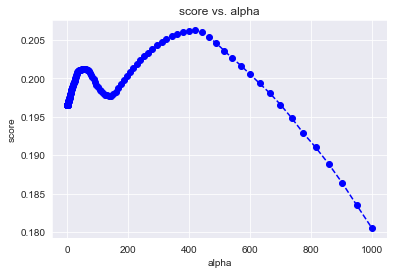

The optimaized alpha and score of Lasso linear is:  420.23278640585664 0.20627059985480622


In [31]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
lr_train, lr_validate = train_test_split(model_train, test_size=0.2, random_state = 0)

lr_train_x = lr_train.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_validate_x = lr_validate.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_train_y = lr_train['cvt_per_day']
lr_validate_y = lr_validate['cvt_per_day']

alphas = np.logspace (-0.3, 3, num=150)
# alphas= [0.000000001]
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    lasso = linear_model.Lasso()
    lasso.set_params(alpha = a)
    lasso.fit(lr_train_x, lr_train_y)
    scores[i] = lasso.score(lr_validate_x, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        lasso_save = lasso
plt.plot(alphas, scores, color='b', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
print('The optimaized alpha and score of Lasso linear is: ', opt_a, max_score)

In [32]:
# combine the validate data and training data, use the optimal alpha, re-train the model
lasso_f = linear_model.Lasso()
lasso_f.set_params(alpha = opt_a)
lasso_f.fit(model_train_x, model_train_y)

Lasso(alpha=420.23278640585664, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn import model_selection
poly = PolynomialFeatures(2)

lr_train, lr_validate = train_test_split(model_train, test_size=0.2, random_state = 0)

lr_train_x = lr_train.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_validate_x = lr_validate.drop(['video_id', 'cvt_per_day'], axis = 1)

lr_train_xp = poly.fit_transform(lr_train_x)
lr_validate_xp = poly.fit_transform(lr_validate_x)
lr_train_y = lr_train['cvt_per_day']
lr_validate_y = lr_validate['cvt_per_day']

In [36]:
# lr_train_xp = pd.DataFrame(data=lr_train_xp, index=data[:], columns=data[0,1:]) 

alphas = np.logspace (-2.6, 2.5, num=20)
# alphas= [1]
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')

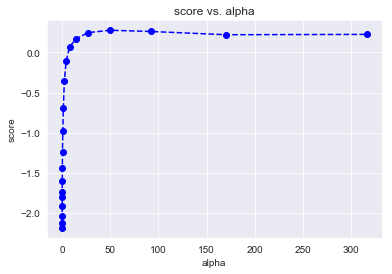

The optimaized alpha and score of Lasso polynomial is:  49.51500669473131 0.2765004785703914


In [37]:
for i, a in enumerate(alphas):
    lasso = linear_model.Lasso()
    lasso.set_params(alpha = a)
    lasso.fit(lr_train_xp, lr_train_y)
    scores[i] = lasso.score(lr_validate_xp, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        lasso_save = lasso
plt.plot(alphas, scores, color='b', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
print('The optimaized alpha and score of Lasso polynomial is: ', opt_a, max_score)

In [38]:
# combine the validate data and training data, use the optimal alpha, re-train the model   ???????????
lr_train_xp1 = poly.fit_transform(model_train_x)

lasso_fp = linear_model.Lasso()
lasso_fp.set_params(alpha = opt_a)
lasso_fp.fit(lr_train_xp1, model_train_y)

Lasso(alpha=49.51500669473131, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

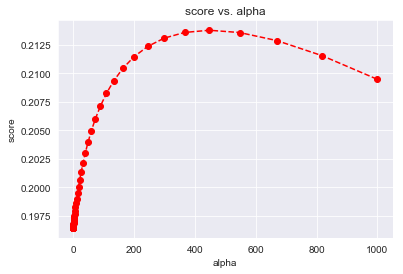

0.2137618035438769 447.720223008213


In [39]:
# Use the same training data set as Lasso (linear features)
lr_train, lr_validate = train_test_split(model_train, test_size=0.2, random_state = 0)
alphas = np.logspace (-10, 3, num=150)
# alphas= [0.000000001]
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    ridge = linear_model.Ridge()
    ridge.set_params(alpha = a)
    ridge.fit(lr_train_x, lr_train_y)
    scores[i] = ridge.score(lr_validate_x, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        ridge_save = ridge
plt.plot(alphas, scores, color='r', linestyle='dashed', marker='o',markerfacecolor='r', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
print(max_score, opt_a)

In [40]:
# add the 20% validate data, use the optimal alpha, re-train the model

ridge_f = linear_model.Ridge()
ridge_f.set_params(alpha = opt_a)
ridge_f.fit(model_train_x, model_train_y)

# ridge_f is the Ridge model (linear feature), to be tested with test data.

Ridge(alpha=447.720223008213, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [41]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)

lr_train, lr_validate = train_test_split(model_train, test_size=0.2, random_state = 0)
lr_train, lr_validate = train_test_split(model_train, test_size=0.15, random_state = 0)

lr_train_x = lr_train.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_validate_x = lr_validate.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_train_y = lr_train['cvt_per_day']
lr_validate_y = lr_validate['cvt_per_day']

lr_train_xp = poly.fit_transform(lr_train_x)
lr_validate_xp = poly.fit_transform(lr_validate_x)

alphas = np.logspace (-2, 2, num=20)
# alphas= [1]
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    ridge = linear_model.Ridge()
    ridge.set_params(alpha = a)
    ridge.fit(lr_train_xp, lr_train_y)
    scores[i] = ridge.score(lr_validate_xp, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        ridge_save = ridge

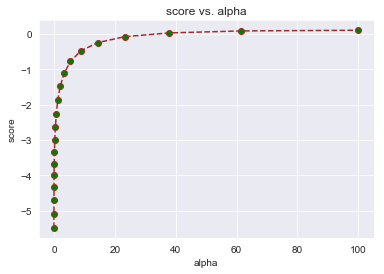

0.10990433163708746 100.0


In [42]:
plt.plot(alphas, scores, color='brown', linestyle='dashed', marker='o',markerfacecolor='g', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
print(max_score, opt_a)

In [43]:
# add the 20% validate data, use the optimal alpha, re-train the model
lr_train_xp1 = poly.fit_transform(model_train_x)

ridge_fp = linear_model.Ridge()
ridge_fp.set_params(alpha = opt_a)
ridge_fp.fit(lr_train_xp1, model_train_y)

Ridge(alpha=100.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
rf_train, rf_test = train_test_split(model_train, test_size=0.2, random_state = 0)

rf_train_x = rf_train.drop(['video_id', 'cvt_per_day'], axis = 1)
rf_test_x = rf_test.drop(['video_id', 'cvt_per_day'], axis = 1)
rf_train_y = rf_train['cvt_per_day']
rf_test_y = rf_test['cvt_per_day']

In [46]:
param_grid = {
                 'n_estimators': [54, 55, 56, 57, 58, 59, 60, 62],
                 'max_depth': [12, 13, 14, 15, 16, 17]
             }

In [47]:
rf = RandomForestRegressor(random_state=2, max_features = 'sqrt')
grid_rf = GridSearchCV(rf, param_grid, cv=5)
grid_rf.fit(rf_train_x, rf_train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='sqrt',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=2,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [12, 13, 14, 15, 16, 

In [48]:
grid_rf.cv_results_

{'mean_fit_time': array([0.10477486, 0.10696168, 0.1091742 , 0.10885758, 0.11189585,
        0.11468282, 0.1157763 , 0.11914697, 0.1106482 , 0.11286783,
        0.1157608 , 0.11891284, 0.12161841, 0.12395558, 0.12622952,
        0.13053675, 0.12257905, 0.12290235, 0.12392278, 0.12658644,
        0.13115444, 0.12806382, 0.1309175 , 0.1322865 , 0.1230617 ,
        0.12556667, 0.12745256, 0.13015661, 0.1326333 , 0.13917584,
        0.14322567, 0.1434298 , 0.12957659, 0.13142934, 0.13427324,
        0.13778067, 0.13859825, 0.14275966, 0.14606795, 0.14851923,
        0.13576808, 0.13937168, 0.14049177, 0.14359503, 0.14524603,
        0.14735579, 0.1505661 , 0.15407958]),
 'std_fit_time': array([0.00678076, 0.00223518, 0.00210933, 0.00151011, 0.00188694,
        0.00122157, 0.00104871, 0.00215257, 0.00213464, 0.00232116,
        0.00144795, 0.00511408, 0.00178431, 0.00307978, 0.00208902,
        0.00144421, 0.0044058 , 0.00157618, 0.00177208, 0.00119216,
        0.00860975, 0.00138269, 0.001

In [49]:
# plot the effect of different number of trees and maximum tree-depth druing cross validation 
scores = grid_rf.cv_results_['mean_test_score']

In [50]:
scores

array([0.51537775, 0.5171172 , 0.51526998, 0.51490516, 0.51216564,
       0.5121823 , 0.5136821 , 0.51484527, 0.51999273, 0.52269776,
       0.52329643, 0.52323389, 0.52028107, 0.51923854, 0.51869277,
       0.51906661, 0.52223467, 0.5240878 , 0.52292368, 0.52385609,
       0.52316206, 0.52260284, 0.52258404, 0.52421867, 0.49977878,
       0.50220054, 0.50059823, 0.50038026, 0.49966063, 0.49870988,
       0.49793484, 0.50039146, 0.52622598, 0.52716249, 0.5261253 ,
       0.52506859, 0.52276801, 0.52216553, 0.52111739, 0.52264413,
       0.52054718, 0.52202076, 0.5234669 , 0.52275486, 0.52453634,
       0.52407839, 0.52239115, 0.52456278])

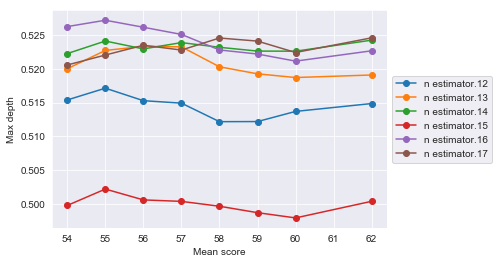

In [51]:
n_est = [54, 55, 56, 57, 58, 59, 60, 62]
m_depth=[12, 13, 14, 15, 16, 17]
scores = np.array(scores).reshape(len(m_depth), len(n_est))
fig = plt.figure()
ax = plt.subplot(111)
for ind, i in enumerate(m_depth):
    plt.plot(n_est, scores[ind], '-o', label='n estimator.' + str(i),)
    
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Mean score')
plt.ylabel('Max depth')
plt.grid(True)
plt.show()
# savefig('rf_1')

In [52]:
# add both training and validation data together as the new training data
rf = RandomForestRegressor(random_state=2, max_features = 'sqrt', max_depth= 14, n_estimators=55)
rf.fit(model_train_x, model_train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=55,
                      n_jobs=None, oob_score=False, random_state=2, verbose=0,
                      warm_start=False)

# Part4: Model Evaluation

In [54]:
# Lasso_f test (with linear features)

lasso_f_score = lasso_f.score(model_test_x, model_test_y)
pred_y = lasso_f.predict(model_test_x)

# The mean squared error and root mean square error
MSE_lasso_f = mean_squared_error(model_test_y, pred_y)
RMSE_lasso_f = sqrt(mean_squared_error(model_test_y, pred_y))

print('lasso_f score: ', lasso_f_score)
print('Mean square error of lasso_f: ', MSE_lasso_f)
print('Root mean squared error of lasso_f:', RMSE_lasso_f)
# print ('Coefficients of lasso_f: ', lasso_f.coef_)

lasso_f score:  0.1264449492385179
Mean square error of lasso_f:  191414216.41243756
Root mean squared error of lasso_f: 13835.252668904806


In [55]:
# Lasso_fp test (with polynomial features)
model_test_xp = poly.fit_transform(model_test_x)
pred_y = lasso_fp.predict(model_test_xp)

lasso_fp_score = lasso_fp.score(model_test_xp, model_test_y)
MSE_lasso_fp = mean_squared_error(model_test_y, pred_y)
RMSE_lasso_fp = sqrt(mean_squared_error(model_test_y, pred_y))

print('lasso_fp score: ', lasso_fp_score)
print('Mean square error of lasso_fp: ', MSE_lasso_fp)
print('Root mean squared error of lasso_fp:', RMSE_lasso_fp)

lasso_fp score:  0.2937219491702878
Mean square error of lasso_fp:  154760320.5442243
Root mean squared error of lasso_fp: 12440.270115404419


In [56]:
# ridge_f test (with linear features)

ridge_f_score = ridge_f.score(model_test_x, model_test_y)
pred_y = ridge_f.predict(model_test_x)

# The mean squared error and root mean square error
MSE_ridge_f = mean_squared_error(model_test_y, pred_y)
RMSE_ridge_f = sqrt(mean_squared_error(model_test_y, pred_y))

print('ridge_f score: ', ridge_f_score)
print('Mean square error of ridge_f: ', MSE_ridge_f)
print('Root mean squared error of ridge_f:', RMSE_ridge_f)

ridge_f score:  0.15211985509291115
Mean square error of ridge_f:  185788306.53841445
Root mean squared error of ridge_f: 13630.418428588846


In [58]:
# ridge_fp test (with polynomial features)
model_test_xp = poly.fit_transform(model_test_x)

ridge_fp_score = ridge_fp.score(model_test_xp, model_test_y)
MSE_ridge_fp = mean_squared_error(model_test_y, pred_y)
RMSE_ridge_fp = sqrt(mean_squared_error(model_test_y, pred_y))

pred_y = ridge_fp.predict(model_test_xp)
print('ridge_fp score: ', ridge_f_score)
print('Mean square error of ridge_fp: ', MSE_ridge_fp)
print('Root mean squared error of ridge_fp:', RMSE_ridge_fp)

ridge_fp score:  0.15211985509291115
Mean square error of ridge_fp:  185788306.53841445
Root mean squared error of ridge_fp: 13630.418428588846


In [59]:
rf_score = rf.score(model_test_x, model_test_y)

pred_y = rf.predict(model_test_x)
MSE_rf = mean_squared_error(model_test_y, pred_y)
RMSE_rf = sqrt(mean_squared_error(model_test_y, pred_y))

# The mean squared error and root mean square error
print('rf score: ', rf_score)
print('Mean square error of rf: ', MSE_rf)
print('Root mean squared error of rf:', RMSE_rf)

rf score:  0.5233477892161215
Mean square error of rf:  104444487.32672259
Root mean squared error of rf: 10219.808575835586


No handles with labels found to put in legend.


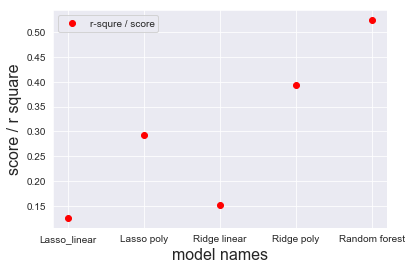

No handles with labels found to put in legend.


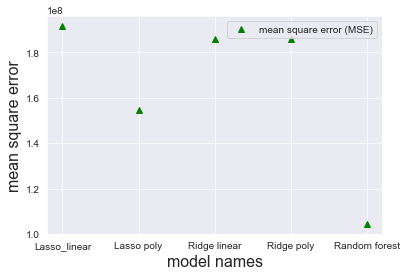

No handles with labels found to put in legend.


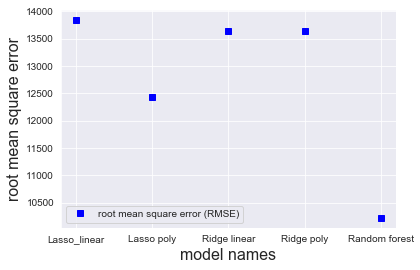

In [60]:
lst_score = [lasso_f_score, lasso_fp_score, ridge_f_score, ridge_fp_score, rf_score]
MSE_lst =  [MSE_lasso_f, MSE_lasso_fp, MSE_ridge_f, MSE_ridge_fp, MSE_rf]
RMSE_lst =  [RMSE_lasso_f, RMSE_lasso_fp, RMSE_ridge_f, RMSE_ridge_fp, RMSE_rf]
model_lst = ['Lasso_linear','Lasso poly', 'Ridge linear', 'Ridge poly', 'Random forest']

plt.figure(1)
plt.plot(model_lst, lst_score, 'ro')
plt.legend(loc = 9)
plt.legend(['r-squre / score'])
plt.xlabel('model names',fontsize =16)
plt.ylabel('score / r square', fontsize =16)
plt.grid(True)
plt.show()

plt.figure(2)
plt.plot(model_lst, MSE_lst, 'g^')
plt.legend(loc = 9)
plt.legend(['mean square error (MSE)'])
plt.xlabel('model names', fontsize =16)
plt.ylabel('mean square error', fontsize =16)
plt.grid(True)
plt.show()

plt.figure(3)
plt.plot(model_lst, RMSE_lst, 'bs')
plt.legend(loc = 9)
plt.legend(['root mean square error (RMSE)'])
plt.xlabel('model names', fontsize =16)
plt.ylabel('root mean square error', fontsize =16)
plt.grid(True)
plt.show()

# Part5: Feature Importance

Feature importance ranking:
1. feature 1 weighted_categorical_position (0.147849)
2. feature 0 weighted_horizontal_poition (0.129749)
3. feature 2 imdb_votes (0.124978)
4. feature 3 budget (0.063139)
5. feature 4 boxoffice (0.053798)
6. feature 8 imdb_rating (0.049440)
7. feature 7 duration_in_mins (0.047520)
8. feature 11 metacritic_score (0.035516)
9. feature 6 star_category (0.035494)
10. feature 9 lionsgate (0.034595)
11. feature 5 mgm (0.029969)
12. feature 53 other (0.028168)
13. feature 10 paramount (0.018973)
14. feature 18 G (0.016873)
15. feature 28 NC-17 (0.013273)
16. feature 42 NotRated (0.011310)
17. feature 22 PG (0.010559)
18. feature 38 PG-13 (0.010527)
19. feature 50 R (0.008787)
20. feature 23 BAFTA (0.008194)
21. feature 30 Golden Globe (0.008081)
22. feature 27 Oscar (0.007545)
23. feature 43 no award (0.006743)
24. feature 15 other award (0.006377)
25. feature 29 Action (0.006183)
26. feature 52 Adventure (0.006153)
27. feature 24 Animation (0.006074)
28. feature 

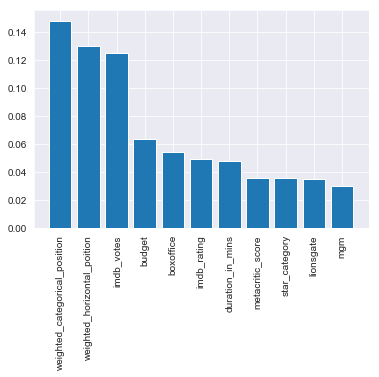

In [61]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
feature_name = model_test_x.columns.get_values()

# Print the feature ranking
print("Feature importance ranking:")

for f in range(model_test_x.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f],  feature_name[f], importances[indices[f]]))
    
plt.figure(1)
plt.bar(feature_name[:11], importances[indices[:11]])
plt.xticks(rotation=90)
plt.show()